# Pymaceuticals Inc.
---

### Analysis

- In this scenario, I joined a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.The executive team has tasked you with generating all of the tables and figures needed for the technical report of the clinical study. They have also asked you for a top-level summary of the study results.

-Overall, I found that the drug Capomulin has a strong correlation between weight and tumor size in mice studied, among other findings.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame and Display the data table for preview
mouse_metadata_complete_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mouse_metadata_complete_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
#note: I worked with Beatrice from class on this portion
mouse_count = mouse_metadata["Mouse ID"].value_counts()
number_of_mice = len(mouse_count)
number_of_mice

249

In [8]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = mouse_metadata_complete_df.loc[mouse_metadata_complete_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = mouse_metadata_complete_df.loc[mouse_metadata_complete_df["Mouse ID"] == "g989"]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#note: I used the discussion in https://stackoverflow.com/questions/14057007/remove-rows-not-isinx 
#for this section, and worked with TA Mark
unduplicated_df = mouse_metadata_complete_df[mouse_metadata_complete_df["Mouse ID"].isin(duplicate_mice_ID)==False]
unduplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [11]:
# Checking the number of mice in the clean DataFrame.
unduplicated_mice = unduplicated_df["Mouse ID"].nunique()
unduplicated_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#note: I used https://docs.python.org/3/library/statistics.html to find the math functions,
# and the definition of SEM from https://www.sportsci.org/resource/stats/meansd.html
mean = unduplicated_df['Tumor Volume (mm3)'].groupby(unduplicated_df['Drug Regimen']).mean()
median = unduplicated_df['Tumor Volume (mm3)'].groupby(unduplicated_df['Drug Regimen']).median()
variance = unduplicated_df['Tumor Volume (mm3)'].groupby(unduplicated_df['Drug Regimen']).var()
stdev = unduplicated_df['Tumor Volume (mm3)'].groupby(unduplicated_df['Drug Regimen']).std()
SEM = unduplicated_df['Tumor Volume (mm3)'].groupby(unduplicated_df['Drug Regimen']).sem()

regimen_summary = pd.DataFrame({
    "mean tumor volume":mean,
    "median tumor volume":median,
    "variance of  tumor volume ":variance,
    "standard deviation of  tumor volume":stdev,
    "SEM of  tumor volume":SEM})
regimen_summary


,mean tumor volume,median tumor volume,variance of tumor volume,standard deviation of tumor volume,SEM of tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#note: I used https://datagy.io/pandas-groupby-multiple-columns/ to better understand .aggregate
#Discussed with TA Mark
grouped = unduplicated_df.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
grouped

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

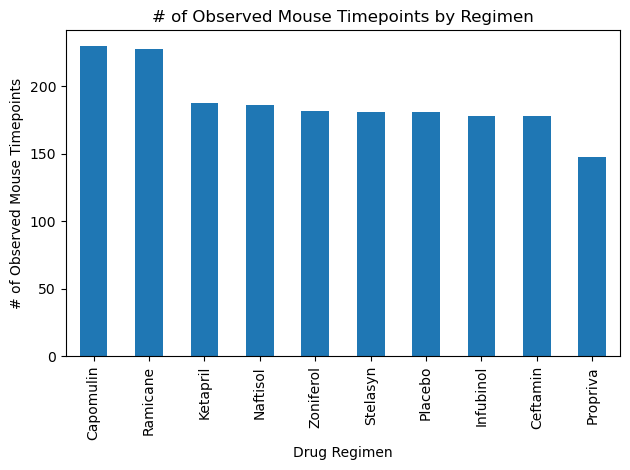

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = unduplicated_df["Drug Regimen"].value_counts()
bar_plot = mice_count.plot.bar()
plt.title("# of Observed Mouse Timepoints by Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()

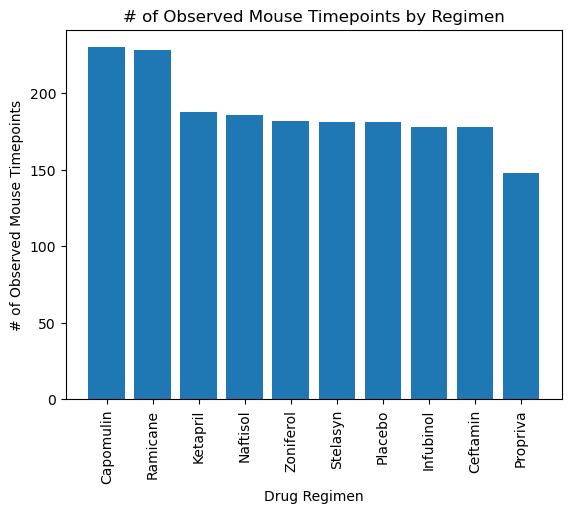

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#note: I referenced https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
mice_count = unduplicated_df["Drug Regimen"].value_counts()
Drug_Regimen=mice_count.index.values
mice_timepoints=mice_count.values
plt.bar(Drug_Regimen, mice_timepoints, width = .8)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("# of Observed Mouse Timepoints by Regimen")
plt.xticks(rotation="vertical")
plt.show()

<Axes: ylabel='Sex'>

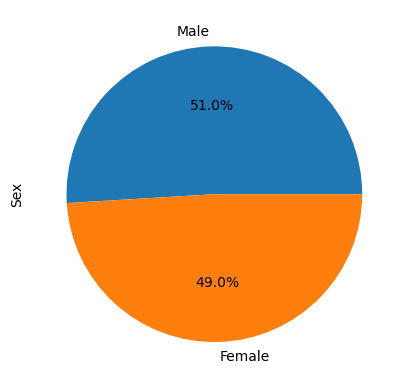

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#referenced https://www.geeksforgeeks.org/how-to-create-pie-chart-from-pandas-dataframe/
mice_sex_count = unduplicated_df["Sex"].value_counts()
mice_sex_count.plot(kind='pie', y='mice_sex_count', autopct='%1.1f%%')

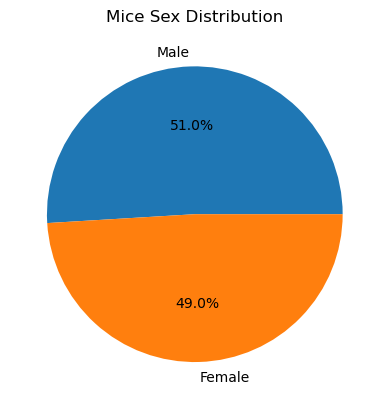

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#note: referenced https://www.w3schools.com/python/matplotlib_pie_charts.asp
mice_sex_count = unduplicated_df["Sex"].value_counts()
labels = 'Male', 'Female'
plt.title("Mice Sex Distribution")
plt.pie(mice_sex_count, labels=labels,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

mouse_max_timepoint = mouse_metadata_complete_df.groupby('Mouse ID').max()['Timepoint']
mouse_max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_tumor_df = pd.merge(mouse_max_timepoint, unduplicated_df, on=("Mouse ID","Timepoint"),how="left")
last_tumor_df

#note: I found out how to do multiple options for .loc from https://sparkbyexamples.com/pandas/pandas-loc-multiple-conditions/ . This would narrow down the list already to the drugs
#we wanted, but since it later asks for loops, I removed this, but am keeping it as markup so I can reference this for my own use.
#last_tumor_limited = last_tumor.loc[(last_tumor["Drug Regimen"] == "Capomulin") | (last_tumor["Drug Regimen"] == "Ceftamin") | (last_tumor["Drug Regimen"] == "Ramicane") | (last_tumor["Drug Regimen"] == "Infubinol")]
#last_tumor_limited_df = pd.DataFrame(last_tumor_limited)
#last_tumor_limited_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45,70.717621,4.0,Placebo,Female,17.0,29.0
3,a275,45,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30,63.440686,1.0,Stelasyn,Female,16.0,29.0
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0.0,Propriva,Female,12.0,26.0
245,z578,45,30.638696,0.0,Ramicane,Male,11.0,16.0
246,z581,45,62.754451,3.0,Infubinol,Female,24.0,25.0
247,z795,45,65.741070,3.0,Naftisol,Female,13.0,29.0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
for treatment in treatments:
    treatment_regimen = last_tumor_df.loc[last_tumor_df["Drug Regimen"] == treatment]
    tumor_vol= treatment_regimen['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_vol)
    
#for Capomulin 
quartile_ca = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq_ca = quartile_ca[0.25]
upperq_ca = quartile_ca[0.75]
IQR_ca = upperq_ca-lowerq_ca
lower_bound_ca = round(lowerq_ca - (1.5*IQR_ca),2)
upper_bound_ca = round(upperq_ca + (1.5*IQR_ca),2)

#for Ramicane
quartile_ra = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq_ra = quartile_ra[0.25]
upperq_ra = quartile_ra[0.75]
IQR_ra = upperq_ra-lowerq_ra
lower_bound_ra = round(lowerq_ra - (1.5*IQR_ra),2)
upper_bound_ra = round(upperq_ra + (1.5*IQR_ra),2)

#for Infubinol
quartile_in = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq_in = quartile_in[0.25]
upperq_in = quartile_in[0.75]
IQR_in = upperq_in-lowerq_in
lower_bound_in = round(lowerq_in - (1.5*IQR_in),2)
upper_bound_in = round(upperq_in + (1.5*IQR_in),2)

#for Ceftamin
quartile_ce = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq_ce = quartile_ce[0.25]
upperq_ce = quartile_ce[0.75]
IQR_ce = upperq_ce-lowerq_ce
lower_bound_ce = round(lowerq_ce - (1.5*IQR_ce),2)
upper_bound_ce = round(upperq_ce + (1.5*IQR_ce),2)
  
#   print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[0]} values below {lower_bound_ca} and above {upper_bound_ca} could be outliers")
print(f"For {treatments[1]} values below {lower_bound_ra} and above {upper_bound_ra} could be outliers")
print(f"For {treatments[2]} values below {lower_bound_in} and above {upper_bound_in} could be outliers")
print(f"For {treatments[3]} values below {lower_bound_ce} and above {upper_bound_ce} could be outliers")    

For Capomulin values below 20.7 and above 51.83 could be outliers
For Ramicane values below 17.91 and above 54.31 could be outliers
For Infubinol values below 36.83 and above 82.74 could be outliers
For Ceftamin values below 25.36 and above 87.67 could be outliers


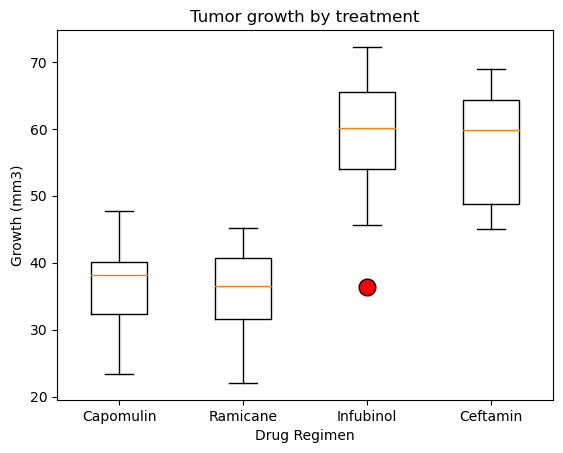

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth by treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()

## Line and Scatter Plots

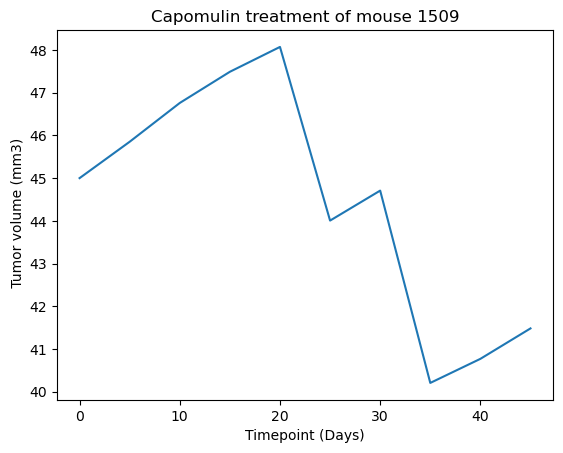

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
ca_mice = unduplicated_df.loc[unduplicated_df["Drug Regimen"] == "Capomulin"]
ca_mice.value_counts("Mouse ID")

#select mouse 1509
mouse_1509 = unduplicated_df.loc[unduplicated_df["Mouse ID"] == "l509",:]

#define variables
x_time = mouse_1509["Timepoint"]
y_tumor = mouse_1509["Tumor Volume (mm3)"]

#define the line
plt.plot(x_time, y_tumor)

#add labels
plt.title( "Capomulin treatment of mouse 1509")
plt.xlabel("Timepoint (Days)")
plt.ylabel(" Tumor volume (mm3)")
plt.show()

C:\Users\roxan\AppData\Local\Temp\ipykernel_18740\4208353686.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ca_group = ca_mice.groupby(["Mouse ID"]).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

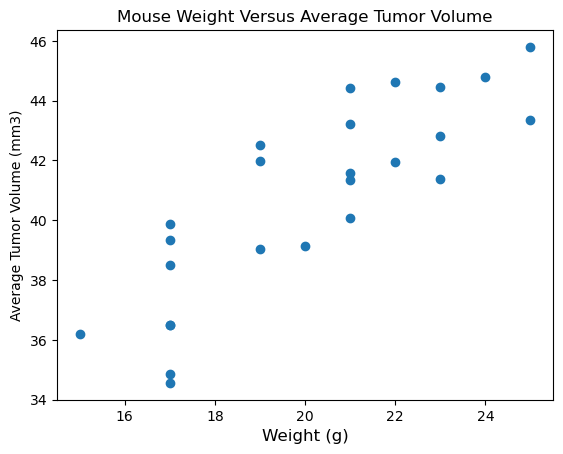

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
ca_group = ca_mice.groupby(["Mouse ID"]).mean()

avg_tumor_vol = ca_group["Weight (g)"]
avg_weight = ca_group["Tumor Volume (mm3)"]

plt.scatter(avg_tumor_vol, avg_weight)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84
The Regression line is modeled by the equation y = 0.95x + 21.55


C:\Users\roxan\AppData\Local\Temp\ipykernel_18740\1545055636.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ca_group = ca_mice.groupby(["Mouse ID"]).mean()


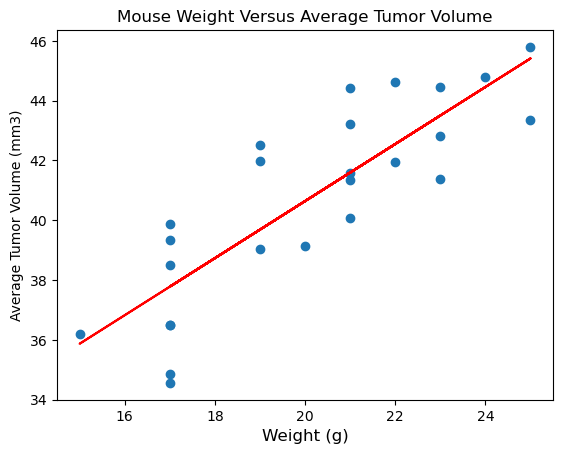

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#create the starting scatter plot (same as before)
ca_group = ca_mice.groupby(["Mouse ID"]).mean()

avg_tumor_vol = ca_group["Weight (g)"]
avg_weight = ca_group["Tumor Volume (mm3)"]

plt.scatter(avg_tumor_vol, avg_weight)
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)')

#calculate relevant items for regression modeling
#correlation efficient
corr=round(st.pearsonr(avg_weight,avg_tumor_vol)[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

#calculate slope, and determine regression line
x_values = avg_tumor_vol
y_values = avg_weight

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The Regression line is modeled by the equation {line_eq}")
plt.plot(x_values,regress_values,"r-")